# Konversi RGB ke HSV

## 1. Normalisasi nilai RGB
Setiap nilai RGB (R, G, B) dinormalisasi ke rentang [0, 1] dengan membaginya dengan 255:

$$
R' = \frac{R}{255},\quad G' = \frac{G}{255},\quad B' = \frac{B}{255}
$$







In [1]:
def normalize_rgb(r, g, b):
    r_prime = r / 255.0
    g_prime = g / 255.0
    b_prime = b / 255.0
    return r_prime, g_prime, b_prime


## 2. Hitung nilai maksimum dan minimum
Temukan nilai maksimum ($C_{max}$) dan minimum ($C_{min}$) dari komponen $R'$, $G'$, dan $B'$:

$$
C_{max} = \text{max}(R', G', B')
$$
$$
C_{min} = \text{min}(R', G', B')
$$

Selisihnya adalah:

$$
\Delta = C_{max} - C_{min}
$$


In [2]:
def calculate_max_min_delta(r_prime, g_prime, b_prime):
    c_max = max(r_prime, g_prime, b_prime)
    c_min = min(r_prime, g_prime, b_prime)
    delta = c_max - c_min
    return c_max, c_min, delta

## 3. Menghitung Hue (H)
- Jika $\Delta = 0$, maka:

$$
H = 0
$$

- Jika $C_{max} = R'$, maka:

$$
H = 60 \times \left( \frac{G' - B'}{\Delta} \mod 6 \right)
$$

- Jika $C_{max} = G'$, maka:

$$
H = 60 \times \left( \frac{B' - R'}{\Delta} + 2 \right)
$$

- Jika $C_{max} = B'$, maka:

$$
H = 60 \times \left( \frac{R' - G'}{\Delta} + 4 \right)
$$

Jika $H$ negatif, tambahkan 360°:

$$
H = H + 360
$$

In [3]:
def calculate_hue(r_prime, g_prime, b_prime, c_max, delta):
    if delta == 0:
        h = 0
    elif c_max == r_prime:
        h = (60 * ((g_prime - b_prime) / delta) + 360) % 360
    elif c_max == g_prime:
        h = (60 * ((b_prime - r_prime) / delta) + 120) % 360
    elif c_max == b_prime:
        h = (60 * ((r_prime - g_prime) / delta) + 240) % 360
    return h

## 4. Menghitung Saturation (S)
- Jika $C_{max} = 0$, maka:

$$
S = 0
$$

- Jika $C_{max} \neq 0$, maka:

$$
S = \frac{\Delta}{C_{max}}
$$

In [4]:
def calculate_saturation(c_max, delta):
    if c_max == 0:
        s = 0
    else:
        s = delta / c_max
    return s * 100 


## 5. Menghitung Value (V)
Nilai Value ($V$) adalah:

$$
V = C_{max}
$$


In [5]:
def calculate_value(c_max):
    return c_max * 100

In [6]:
def rgb_to_hsv(r, g, b):
    # Normalisasi nilai RGB
    r_prime, g_prime, b_prime = normalize_rgb(r, g, b)
    
    # Hitung C_max, C_min, dan Delta
    c_max, c_min, delta = calculate_max_min_delta(r_prime, g_prime, b_prime)
    
    # Hitung Hue
    h = calculate_hue(r_prime, g_prime, b_prime, c_max, delta)
    
    # Hitung Saturation
    s = calculate_saturation(c_max, delta)
    
    # Hitung Value
    v = calculate_value(c_max)
    
    return h, s, v

# NIM 230 20-28-04
r, g, b = 27, 28, 68 
h, s, v = rgb_to_hsv(r, g, b)
print(f"Hue: {h}, Saturation: {s}%, Value: {v}%")


Hue: 238.53658536585365, Saturation: 60.29411764705882%, Value: 26.666666666666668%


In [7]:
def hsv_to_rgb(h, s, v):
    s /= 100
    v /= 100
    c = v * s
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = v - c

    if 0 <= h < 60:
        r_prime, g_prime, b_prime = c, x, 0
    elif 60 <= h < 120:
        r_prime, g_prime, b_prime = x, c, 0
    elif 120 <= h < 180:
        r_prime, g_prime, b_prime = 0, c, x
    elif 180 <= h < 240:
        r_prime, g_prime, b_prime = 0, x, c
    elif 240 <= h < 300:
        r_prime, g_prime, b_prime = x, 0, c
    else:
        r_prime, g_prime, b_prime = c, 0, x

    r = (r_prime + m) * 255
    g = (g_prime + m) * 255
    b = (b_prime + m) * 255

    return int(r), int(g), int(b)

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Fungsi untuk menampilkan satu warna RGB dan hasil konversi HSV-nya
def display_rgb_to_hsv(rgb):
    hsv = rgb_to_hsv(*rgb)
    print(f"RGB{rgb} -> HSV{hsv}")

In [10]:
# Fungsi untuk membandingkan daftar warna RGB dengan konversi HSV
def compare_rgb_to_hsv(colors_rgb):
    print(f"{'RGB':^20} | {'HSV':^30}")
    print('-' * 50)
    for color in colors_rgb:
        display_rgb_to_hsv(color)

In [11]:
# Fungsi untuk membuat gambar dari warna RGB menggunakan OpenCV
def create_color_image(rgb, image_size=(100, 100)):
    image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    image[:] = rgb  # Mengisi gambar dengan warna RGB
    return image

In [12]:
# Fungsi untuk menampilkan warna RGB dan hasil konversi HSV secara visual di Jupyter Notebook
def visualize_rgb_to_hsv(colors_rgb):
    fig, axes = plt.subplots(len(colors_rgb), 2, figsize=(8, len(colors_rgb) * 4))
    
    if len(colors_rgb) == 1:
        axes = [axes]  # Jika hanya ada satu warna, 'axes' tidak akan berupa array, jadi kita ubah ke list
    
    for i, rgb in enumerate(colors_rgb):
        hsv = rgb_to_hsv(*rgb)
        
        # Buat gambar RGB menggunakan OpenCV dengan mengubah urutan RGB ke BGR
        bgr_image = create_color_image((rgb[2], rgb[1], rgb[0]))  # Tukar urutan RGB ke BGR
        
        # Konversi dari HSV (0-360, 0-100, 0-100) ke format OpenCV (0-179, 0-255, 0-255)
        hsv_opencv = (int(hsv[0] / 2), int(hsv[1] * 2.55), int(hsv[2] * 2.55))
        hsv_image = cv.cvtColor(create_color_image(hsv_opencv), cv.COLOR_HSV2BGR)
        
        # Konversi dari BGR ke RGB untuk Matplotlib
        rgb_image_corrected = cv.cvtColor(bgr_image, cv.COLOR_BGR2RGB)
        
        # Plot gambar RGB
        axes[i][0].imshow(rgb_image_corrected)
        axes[i][0].set_title(f"RGB: {rgb}")
        axes[i][0].axis('off')
        
        # Plot gambar HSV (hasil konversi ke BGR untuk tampilan)
        hsv_image_corrected = cv.cvtColor(hsv_image, cv.COLOR_BGR2RGB)
        axes[i][1].imshow(hsv_image_corrected)
        axes[i][1].set_title(f"HSV (H:{hsv[0]:.2f}, S:{hsv[1]:.2f}%, V:{hsv[2]:.2f}%)")
        axes[i][1].axis('off')
    
    plt.tight_layout()
    plt.show()

        RGB          |              HSV              
--------------------------------------------------
RGB(20, 28, 0.4) -> HSV(77.3913043478261, 98.57142857142857, 10.980392156862745)
RGB(255, 0, 0) -> HSV(0.0, 100.0, 100.0)
RGB(0, 255, 0) -> HSV(120.0, 100.0, 100.0)
RGB(0, 0, 255) -> HSV(240.0, 100.0, 100.0)
RGB(255, 255, 0) -> HSV(60.0, 100.0, 100.0)
RGB(0, 255, 255) -> HSV(180.0, 100.0, 100.0)
RGB(255, 0, 255) -> HSV(300.0, 100.0, 100.0)
RGB(128, 128, 128) -> HSV(0, 0.0, 50.19607843137255)


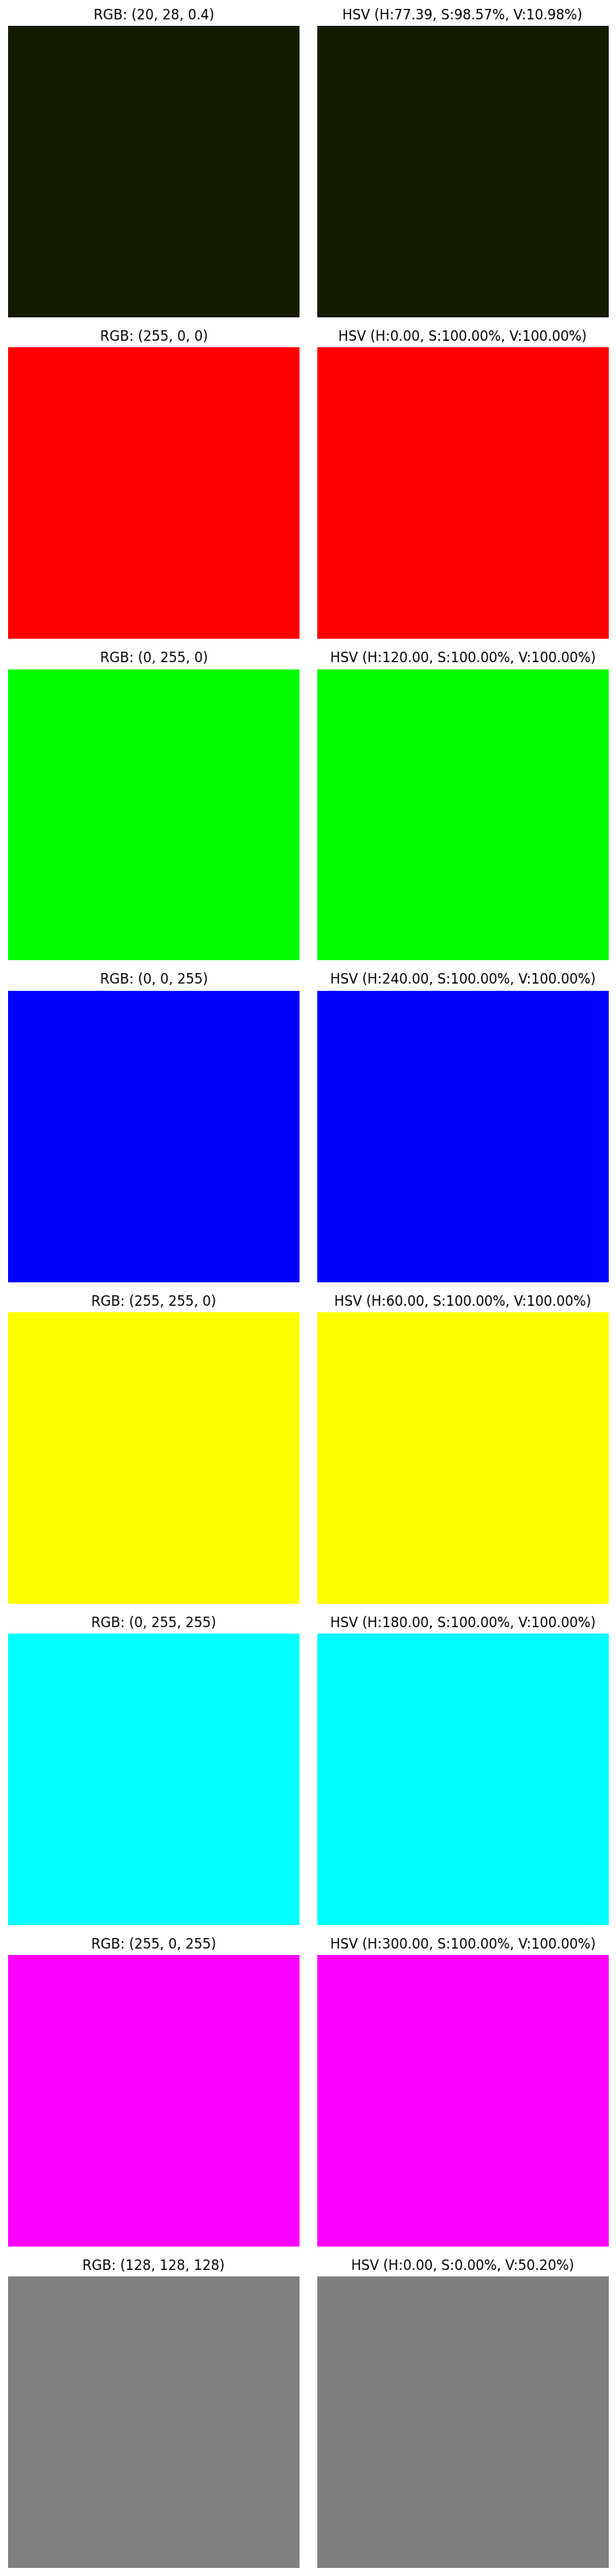

In [13]:
# Fungsi untuk memulai proses perbandingan visual RGB ke HSV
def add_and_compare_rgb_to_hsv_visual():
    # Daftar warna RGB custom yang ingin dibandingkan
    # 230 202804
    custom_rgb_colors = [
        (20, 28, 0.4), # color by nim
        (255, 0, 0),   # Merah
        (0, 255, 0),   # Hijau
        (0, 0, 255),   # Biru
        (255, 255, 0), # Kuning
        (0, 255, 255), # Cyan
        (255, 0, 255), # Magenta
        (128, 128, 128), # Abu-abu
    ]
    
    # Tampilkan perbandingan teks RGB dan HSV
    compare_rgb_to_hsv(custom_rgb_colors)
    
    # Visualisasikan RGB ke HSV menggunakan OpenCV dan Matplotlib
    visualize_rgb_to_hsv(custom_rgb_colors)

# Memulai proses visual dan perbandingan
add_and_compare_rgb_to_hsv_visual()